In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy
from scipy.stats import t
from scipy.stats import kstest
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
import pulp
import pandas as pd
import scipy.stats as stats

# Create random variables in standard normal distribution with Box-Muller

In [2]:
#https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
case=1000
x1=[]
x2=[]
random.seed(42)
for i in np.arange(1,1001,1):
    U1 = np.random.rand(case) #generate in the uniform distribution [0,1)
    U2 = np.random.rand(case)
    z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    x1.append(z1)
    x2.append(z2)

# Visualize the generated input data

0.9998881231893134
1.0001055769036085
-0.00032231394463391174
-0.000233481422920585


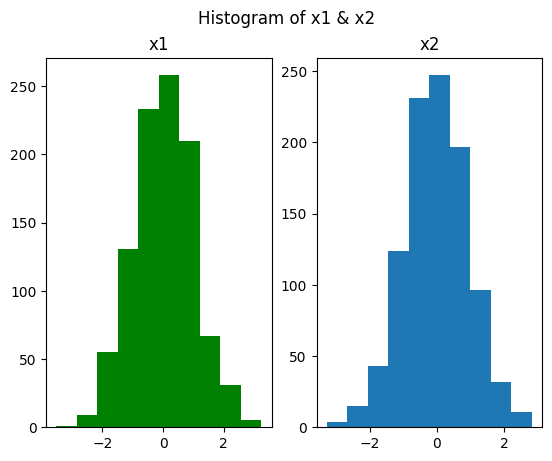

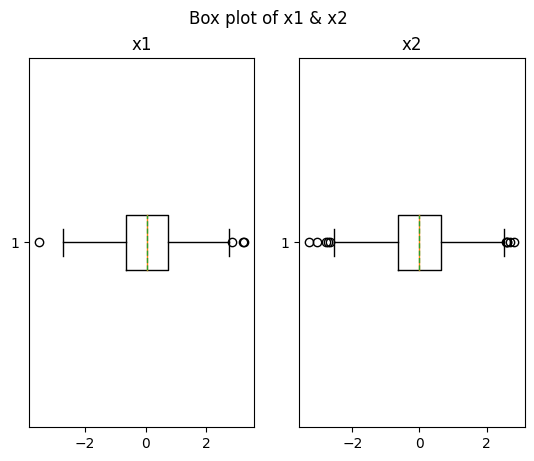

<Figure size 568x284 with 0 Axes>

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram of x1 & x2')
ax1.set_title('x1')
ax2.set_title('x2')
ax1.hist(z1,color='green')
ax2.hist(z2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Box plot of x1 & x2')
ax1.set_title('x1')
ax2.set_title('x2')
ax1.boxplot(z1,showmeans=True, meanline=True,vert=0)
ax2.boxplot(z2, showmeans=True, meanline=True,vert=0)
f = plt.figure()# create figure
f.set_figwidth(4) # set width, height, dpi
f.set_figheight(2)
f.set_dpi(142)

In [ ]:
z1df = pd.DataFrame({'z1':z1})
z1df = pd.DataFrame({'z2':z2})
print(z1df['z1'].describe())
print(z2df['z2'].describe())

# Transform value for std {0.1;0.5;1.0;1.5}
# Choose the edge source to 1 with capacity 20

In [4]:
combine=np.concatenate((z1,z2))
combinedf = pd.DataFrame({'random N(0,1)':combine})
print(combinedf['random N(0,1)'].describe())

the std is 0.9803398690846709
the mean is 0.006738670350579497


#Export to excel
combinedf_path = 'random N(0,1)_official.xlsx'
combinedf.to_excel(combinedf_path, index=False)

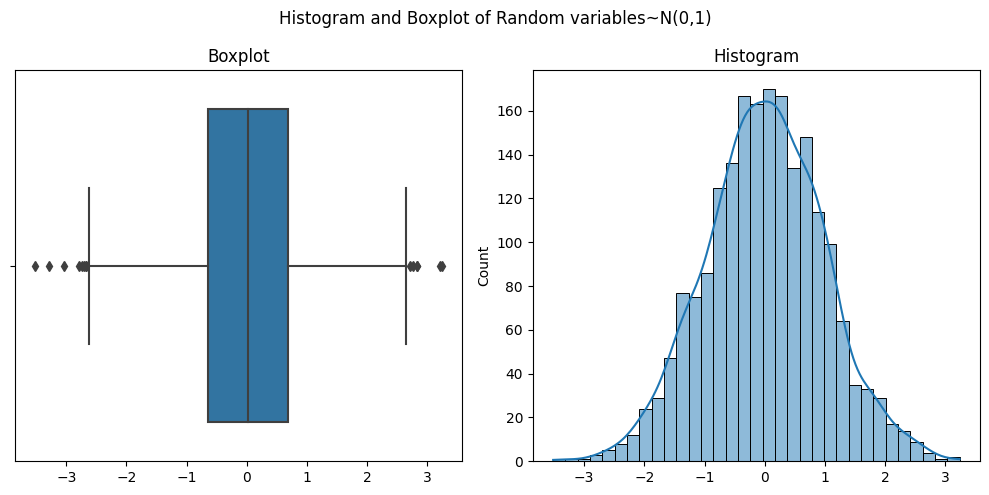

In [5]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Histogram and Boxplot of Random variables~N(0,1)')
sns.boxplot(x=combine, ax=ax_box)
ax_box.set_title('Boxplot')
sns.histplot(combine, ax=ax_hist, kde=True)
ax_hist.set_title('Histogram')

plt.tight_layout()

# Present the new distribution after using location-scale family transform, example 0,5std

In [6]:
mean = 20 #deterministic value
std1=0.1 #std is choosen mannually
value1 = [i*std1 + mean for i in combine]
value1_df = pd.DataFrame({'s_1,std=0.1':value1})
print(value1_df['s_1,std=0.1'].describe())

In [7]:
mean = 20 
std5= 0.5 
value5 = [i*std5 + mean for i in combine]
value5_df = pd.DataFrame({'s_1,std=0.5':value5})
print(value5_df['s_1,std=0.5'].describe())

In [8]:
mean = 20 
std10= 1.0 
value10 = [i*std10 + mean for i in combine]
value10_df = pd.DataFrame({'s_1,std=1.0':value10})
print(value10_df['s_1,std=1.0'].describe())

In [9]:
mean = 20 
std15= 1.5
value15 = [i*std15 + mean for i in combine]
value15_df = pd.DataFrame({'s_1,std=1.5':value15})
print(value15_df['s_1,std=1.5'].describe())

In [10]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value1, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value1, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std1} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value5, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value5, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std5} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value10, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value10, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std10} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of )")
sns.boxplot(x=value15, ax=ax_box,color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value15, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title(f'Histogram of random capacities of edge:source_1 with {std15} std')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#std 0.5
value5_np=np.array(value5)
#draw the input histogram and boxplot
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(f"Histogram and Boxplot of Random Maxflow ~N({mean},{std5})")
sns.boxplot(x=value5_np,ax=ax_box, color='orange')
ax_box.set_title('Boxplot')
sns.histplot(value5_np, ax=ax_hist, kde=True,color='orange')
ax_hist.set_title('Histogram')
ax_hist.set_xlabel('Value')
ax_hist.set_ylabel('Frequency')
plt.show()

# Run linear programming with 1 input capacty with std {0.1;0.5;1.0;1.5}

In [12]:
#std=0.1
maxfl1=[]
for i in value1:
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp += x_s1 <= i
    lp += x_s2 <= 15
    lp += x_s3 <= 17
    lp += x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl1.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl1[:100]}")

Solution status: Optimal
Max flow Random:[50.792572, 51.003013, 50.996127, 51.235909, 50.971218, 51.102756, 50.828813, 51.073445, 51.154973, 50.962856, 50.729104, 50.905819, 50.946247, 50.870968, 50.911337, 51.1564, 51.065172, 51.007572, 50.764038, 50.834071, 51.187545, 50.813317, 50.878457, 51.008351, 50.85513, 51.040996, 51.04204, 50.916352, 51.187483, 50.885471, 51.008135, 50.995766, 51.103626, 50.859254, 50.822425, 50.928767, 50.879645, 50.925528, 50.99872, 50.963765, 51.015646, 50.971765, 51.056218, 50.978327, 50.769786, 51.118605, 50.971614, 51.264011, 51.128986, 50.95199, 51.241186, 50.93771, 51.323828, 51.097085, 50.925215, 50.914105, 51.057877, 50.992401, 51.076677, 51.09973, 51.04032, 51.016431, 50.892974, 51.028728, 50.964108, 50.861746, 50.900438, 51.024389, 51.096308, 51.127149, 50.894863, 51.093426, 51.075683, 51.019162, 51.006229, 51.091428, 50.986865, 50.950684, 51.03058, 51.102009, 51.016704, 50.876883, 50.857632, 51.106029, 50.966045, 50.941322, 50.983198, 50.97734, 5

In [13]:
#std=0.5
maxfl5=[]
for i in value5:
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp +=x_s1 <= i
    lp += x_s2 <= 15
    lp +=x_s3 <= 17
    lp +=x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl5.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl5[:100]}")

Solution status: Optimal
Max flow Random:[49.962859, 51.015065, 50.980633, 52.0, 50.856089, 51.513778, 50.144065, 51.367225, 51.774865, 50.814281, 49.645522, 50.529093, 50.731233, 50.354841, 50.556687, 51.782001, 51.325859, 51.037861, 49.82019, 50.170355, 51.937725, 50.066584, 50.392287, 51.041753, 50.275648, 51.204979, 51.210202, 50.581759, 51.937413, 50.427353, 51.040676, 50.978832, 51.518131, 50.296269, 50.112127, 50.643835, 50.398224, 50.62764, 50.993599, 50.818824, 51.078232, 50.858827, 51.281088, 50.891637, 49.848931, 51.593023, 50.858069, 52.0, 51.644932, 50.759951, 52.0, 50.68855, 52.0, 51.485426, 50.626073, 50.570527, 51.289384, 50.962004, 51.383384, 51.49865, 51.201602, 51.082153, 50.464872, 51.143638, 50.820541, 50.308729, 50.502189, 51.121946, 51.481541, 51.635745, 50.474317, 51.467128, 51.378417, 51.095808, 51.031145, 51.457138, 50.934325, 50.753419, 51.1529, 51.510043, 51.083518, 50.384414, 50.288161, 51.530143, 50.830227, 50.70661, 50.915988, 50.886699, 50.567498, 51.616

In [14]:
maxfl10=[]
for i in value10:
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp +=x_s1 <= i
    lp += x_s2 <= 15
    lp +=x_s3 <= 17
    lp +=x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl10.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl10[:100]}")

Solution status: Optimal
Max flow Random:[48.925718, 51.03013, 50.961265, 52.0, 50.712179, 52.0, 49.28813, 51.734451, 52.0, 50.628561, 48.291043, 50.058186, 50.462466, 49.709682, 50.113374, 52.0, 51.651718, 51.075723, 48.640379, 49.34071, 52.0, 49.133168, 49.784574, 51.083507, 49.551297, 51.409959, 51.420403, 50.163517, 52.0, 49.854705, 51.081351, 50.957664, 52.0, 49.592539, 49.224255, 50.287671, 49.796447, 50.25528, 50.987198, 50.637648, 51.156463, 50.717653, 51.562175, 50.783274, 48.697861, 52.0, 50.716138, 52.0, 52.0, 50.519903, 52.0, 50.3771, 52.0, 51.970852, 50.252146, 50.141054, 51.578767, 50.924009, 51.766768, 51.9973, 51.403203, 51.164306, 49.929745, 51.287276, 50.641082, 49.617458, 50.004377, 51.243891, 51.963082, 52.0, 49.948635, 51.934256, 51.756834, 51.191615, 51.062289, 51.914277, 50.868649, 50.506837, 51.3058, 52.0, 51.167036, 49.768827, 49.576323, 52.0, 50.660455, 50.413219, 50.831975, 50.773399, 50.134996, 52.0, 51.206853, 52.0, 51.142445, 52.0, 50.714638, 49.016238, 50

In [15]:
#std=1.5
maxfl15=[]
for i in value15 :
    lp = pulp.LpProblem("Random_Max_Flow_Problem", pulp.LpMaximize)
    # Define variables representing flow on edgeso
    x_s1 = pulp.LpVariable(name='source_1',lowBound=0, cat='Continuous')
    x_s2 = pulp.LpVariable(name='source_2',lowBound=0, cat='Continuous')
    x_s3 = pulp.LpVariable(name='source_3',lowBound=0, cat='Continuous')
    x_14 = pulp.LpVariable(name='1_4',lowBound=0, cat='Continuous')
    x_15 = pulp.LpVariable(name='1_5',lowBound=0, cat='Continuous')
    x_24 = pulp.LpVariable(name='2_4',lowBound=0, cat='Continuous')
    x_25 = pulp.LpVariable(name='2_5',lowBound=0, cat='Continuous')
    x_26 = pulp.LpVariable(name='2_6',lowBound=0, cat='Continuous')
    x_35 = pulp.LpVariable(name='3_5',lowBound=0, cat='Continuous')
    x_4t = pulp.LpVariable(name='4_t',lowBound=0, cat='Continuous')
    x_5t = pulp.LpVariable(name='5_t',lowBound=0, cat='Continuous')
    x_6t = pulp.LpVariable(name='6_t',lowBound=0, cat='Continuous')
    x_0 = pulp.LpVariable(name= 'Z', lowBound=0, cat='Continuous')
    #the objective function
    lp+=  x_0
    #flow coversation constraints
    lp += x_s1 == x_14 + x_15
    lp += x_s2 == x_24 + x_25 + x_26
    lp += x_s3 == x_35
    lp += x_14 + x_24 == x_4t
    lp += x_15 + x_25 + x_35 == x_5t
    lp += x_26 == x_6t
    lp += x_0 == x_s1 + x_s2 + x_s3
    lp += x_4t + x_5t + x_6t == x_0
    #limit constraint
    lp +=x_s1 <= i
    lp += x_s2 <= 15
    lp +=x_s3 <= 17
    lp +=x_14 <= 18
    lp += x_15 <= 21
    lp += x_24 <= 19
    lp += x_25 <= 17
    lp += x_26 <= 18
    lp += x_35 <= 16
    lp += x_4t <= 23
    lp += x_5t <= 19
    lp += x_6t <= 15
    # Solve the LP problem & add to the list of outcomes
    lp.solve()
    maxfl15.append(pulp.value(lp.objective))
'==============================='
status = pulp.LpStatus[lp.status]
print(f"Solution status: {status}")
print("================")
print(f"Max flow Random:{maxfl15[:100]}")

Solution status: Optimal
Max flow Random:[47.888577, 51.045194, 50.941898, 52.0, 50.568268, 52.0, 48.432194, 52.0, 52.0, 50.442842, 46.936565, 49.587279, 50.193699, 49.064522, 49.670061, 52.0, 51.977577, 51.113584, 47.460569, 48.511065, 52.0, 48.199752, 49.176861, 51.12526, 48.826945, 51.614938, 51.630605, 49.745276, 52.0, 49.282058, 51.122027, 50.936496, 52.0, 48.888808, 48.336382, 49.931506, 49.194671, 49.88292, 50.980797, 50.456472, 51.234695, 50.57648, 51.843263, 50.67491, 47.546792, 52.0, 50.574207, 52.0, 52.0, 50.279854, 52.0, 50.06565, 52.0, 52.0, 49.878219, 49.71158, 51.868151, 50.886013, 52.0, 52.0, 51.604805, 51.24646, 49.394617, 51.430914, 50.461622, 48.926187, 49.506566, 51.365837, 52.0, 52.0, 49.422952, 52.0, 52.0, 51.287423, 51.093434, 52.0, 50.802974, 50.260256, 51.4587, 52.0, 51.250554, 49.153241, 48.864484, 52.0, 50.490682, 50.119829, 50.747963, 50.660098, 49.702494, 52.0, 51.31028, 52.0, 51.213667, 52.0, 50.571957, 48.024356, 49.70337, 49.782213, 51.229052, 52.0, 51.3

# transform value into data frame and show statistic summary

In [16]:
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
#std=0.1
df1 = pd.DataFrame({'maxflow':maxfl1})
print(type(df1))
print(df1.head())
print(df1.shape)
print("================")
#statistic summary
summary1= df1['maxflow'].describe()
print(summary1)

<class 'pandas.core.frame.DataFrame'>
     maxflow
0  50.792572
1  51.003013
2  50.996127
3  51.235909
4  50.971218
(2000, 1)
count    2000.000000
mean       51.000674
std         0.098059
min        50.648440
25%        50.935658
50%        51.001717
75%        51.068449
max        51.323828
Name: maxflow, dtype: float64


In [17]:
#std=0.5
df5 = pd.DataFrame({'maxflow':maxfl5})
print(df5.head())
#summary statisitcs
print("================")
summary5= df5['maxflow'].describe()
print(summary5)

     maxflow
0  49.962859
1  51.015065
2  50.980633
3  52.000000
4  50.856089
count    2000.000000
mean       50.999013
std         0.479991
min        49.242198
25%        50.678289
50%        51.008584
75%        51.342246
max        52.000000
Name: maxflow, dtype: float64


In [18]:
#std=1.0
df10 = pd.DataFrame({'maxflow':maxfl10})
print(df10.head())
#summary statisitcs
print("================")
summary10= df10['maxflow'].describe()
print(summary10)

     maxflow
0  48.925718
1  51.030130
2  50.961265
3  52.000000
4  50.712179
count    2000.000000
mean       50.928601
std         0.852775
min        47.484396
25%        50.356579
50%        51.017170
75%        51.684493
max        52.000000
Name: maxflow, dtype: float64


In [19]:
#std=1.5
df15 = pd.DataFrame({'maxflow':maxfl15})
print(df15.head())
#summary statisitcs
print("================")
summary15= df15['maxflow'].describe()
print(summary15)

     maxflow
0  47.888577
1  51.045194
2  50.941898
3  52.000000
4  50.568268
count    2000.000000
mean       50.793805
std         1.166918
min        45.726594
25%        50.034868
50%        51.025754
75%        52.000000
max        52.000000
Name: maxflow, dtype: float64


# Visualization with plot, histogram and boxplot

## a. Plot

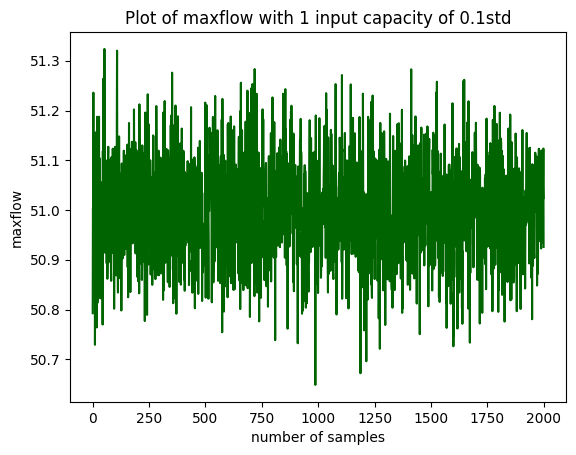

<Figure size 600x400 with 0 Axes>

In [20]:
#std=0.1
plt.plot(np.arange(len(maxfl1)),maxfl1, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 1 input capacity of {std1}std')
plt.figure(figsize=(6, 4))

plt.savefig("value.png")

In [21]:
import os
print(os.getcwd())

C:\Users\DELL


<Figure size 600x400 with 0 Axes>

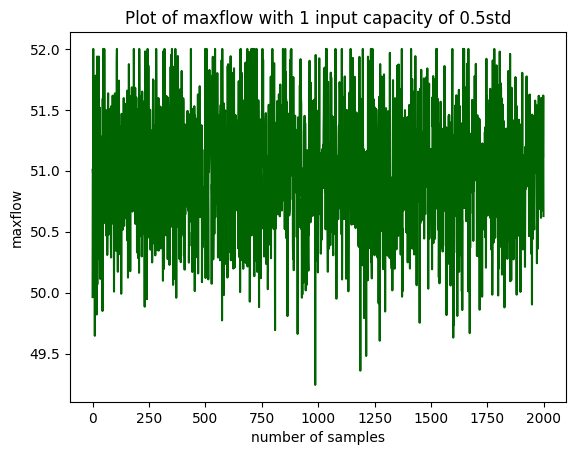

<Figure size 600x400 with 0 Axes>

In [22]:
#std=0.5
#https://matplotlib.org/stable/gallery/color/named_colors.html
plt.plot(np.arange(len(maxfl5)),maxfl5, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 1 input capacity of {std5}std')
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

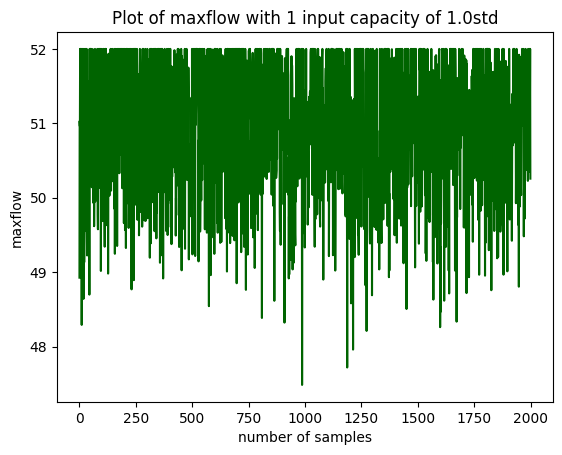

<Figure size 600x400 with 0 Axes>

In [23]:
#std=1.0
#https://matplotlib.org/stable/gallery/color/named_colors.html
plt.plot(np.arange(len(maxfl10)),maxfl10, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 1 input capacity of {std10}std')
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

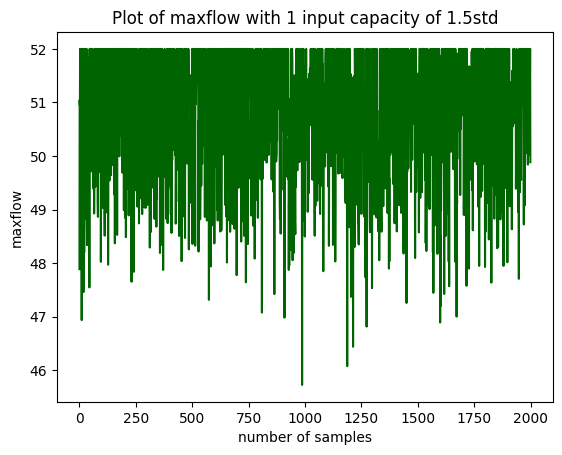

<Figure size 600x400 with 0 Axes>

In [24]:
#std=1.5
plt.plot(np.arange(len(maxfl15)),maxfl15, color='darkgreen')
plt.xlabel('number of samples')
plt.ylabel('maxflow')
plt.title(f'Plot of maxflow with 1 input capacity of {std15}std')
plt.figure(figsize=(6, 4))

## b. histogram

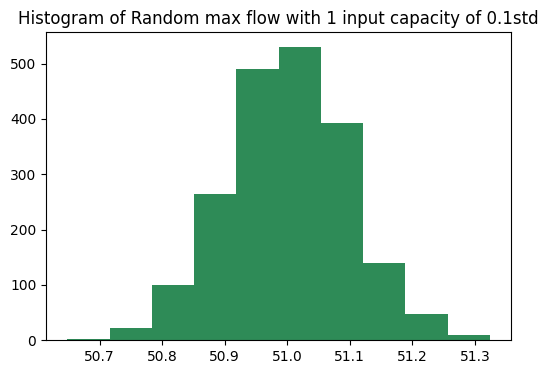

In [25]:
#std=0.1
plt.figure(figsize=(6, 4))
plt.title(f"Histogram of Random max flow with 1 input capacity of {std1}std")
plt.hist(maxfl1,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.show()

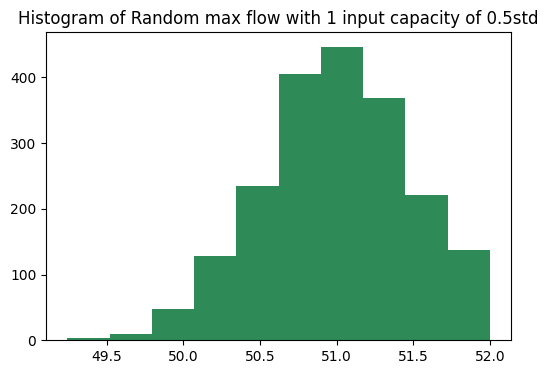

In [36]:
#std=0.5
plt.figure(figsize=(6, 4))
plt.title(f"Histogram of Random max flow with 1 input capacity of {std5}std")
plt.hist(maxfl5,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.show()

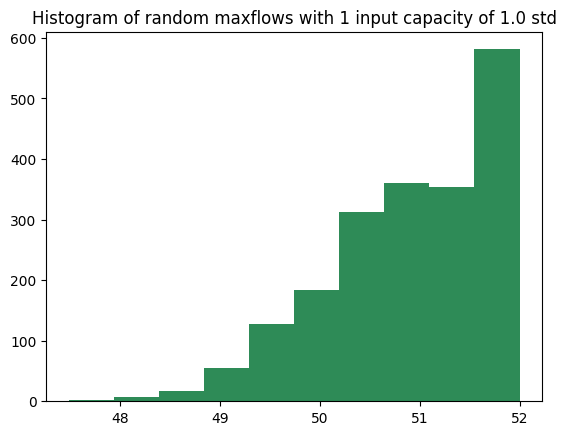

In [27]:
#std=1.0
plt.hist(maxfl10,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.title(f"Histogram of random maxflows with 1 input capacity of {std10} std")
plt.show()

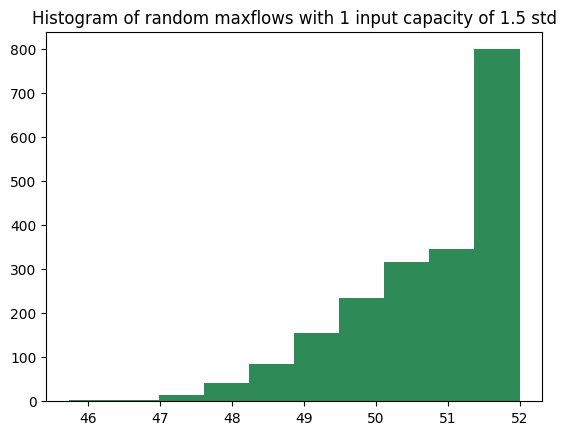

In [28]:
#std 1.5
plt.hist(maxfl15,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.title(f"Histogram of random maxflows with 1 input capacity of {std15} std")
plt.show()

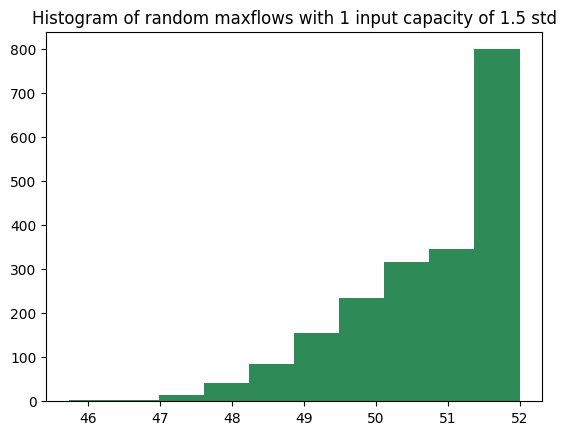

In [29]:
#std=1.5
plt.hist(maxfl15,color='seagreen')
plt.xlabel='Value'
plt.ylabel='Frequency'
plt.title(f"Histogram of random maxflows with 1 input capacity of {std15} std")
plt.show()

## c. boxplot

[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 0.1std')]

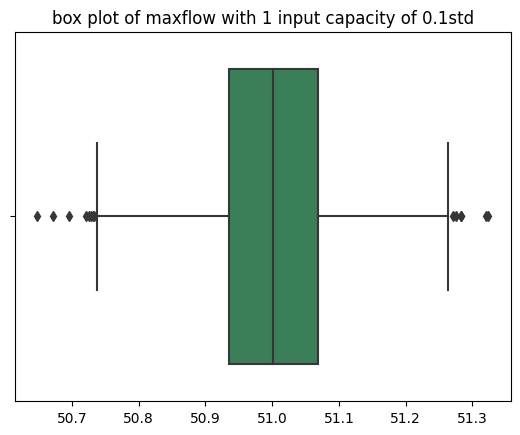

In [30]:
#std=0.1
sns.boxplot(x=maxfl1,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std1}std')

[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 0.5std')]

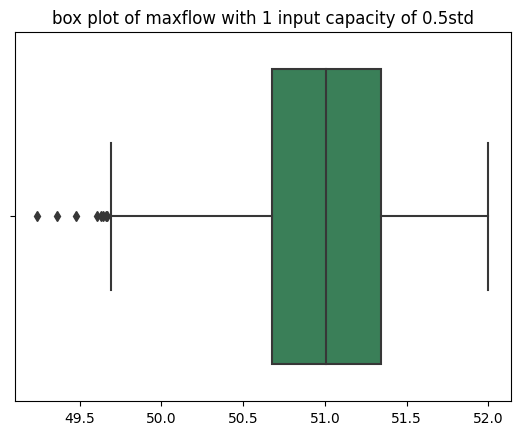

In [31]:
#std=0.5
sns.boxplot(x=maxfl5,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std5}std')


[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 1.0std')]

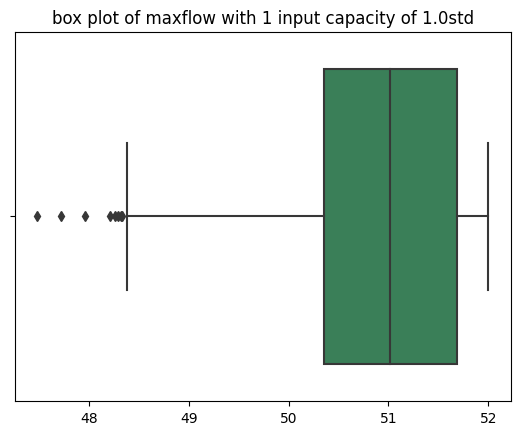

In [32]:
#std=1.5
sns.boxplot(x=maxfl10,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std10}std')

[Text(0.5, 1.0, 'box plot of maxflow with 1 input capacity of 1.5std')]

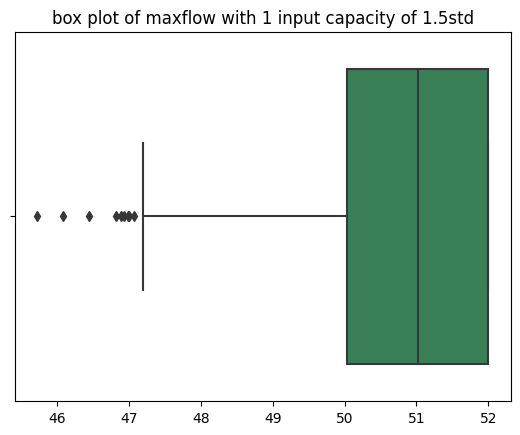

In [33]:
#std=1.5
sns.boxplot(x=maxfl15,color='seagreen').set(title= f'box plot of maxflow with 1 input capacity of {std15}std')

linreg= sm.OLS(maxfl1, dt)
model= linreg.fit()
print(model.params)       # Accessing coefficients
print(model.summary())    # Summary of the regression results
print(model.fittedvalues) 

In [46]:
ks= kstest(maxfl1, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution


In [48]:
ks= kstest(maxfl5, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution


In [47]:
ks= kstest(maxfl10, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution


In [49]:
ks= kstest(maxfl15, 'norm')
print('p-value:', ks[1])
alpha= 0.05
if ks[1] <alpha:
    print('Reject the null hypothesis: Normal distribution')
else:
    print('Accept the null hypothesis: Normal distibution')

p-value: 0.0
Reject the null hypothesis: Normal distribution
